First 5 energy levels:
E_0 = 0.5020
E_1 = 1.5059
E_2 = 2.5099
E_3 = 3.5137
E_4 = 4.5175


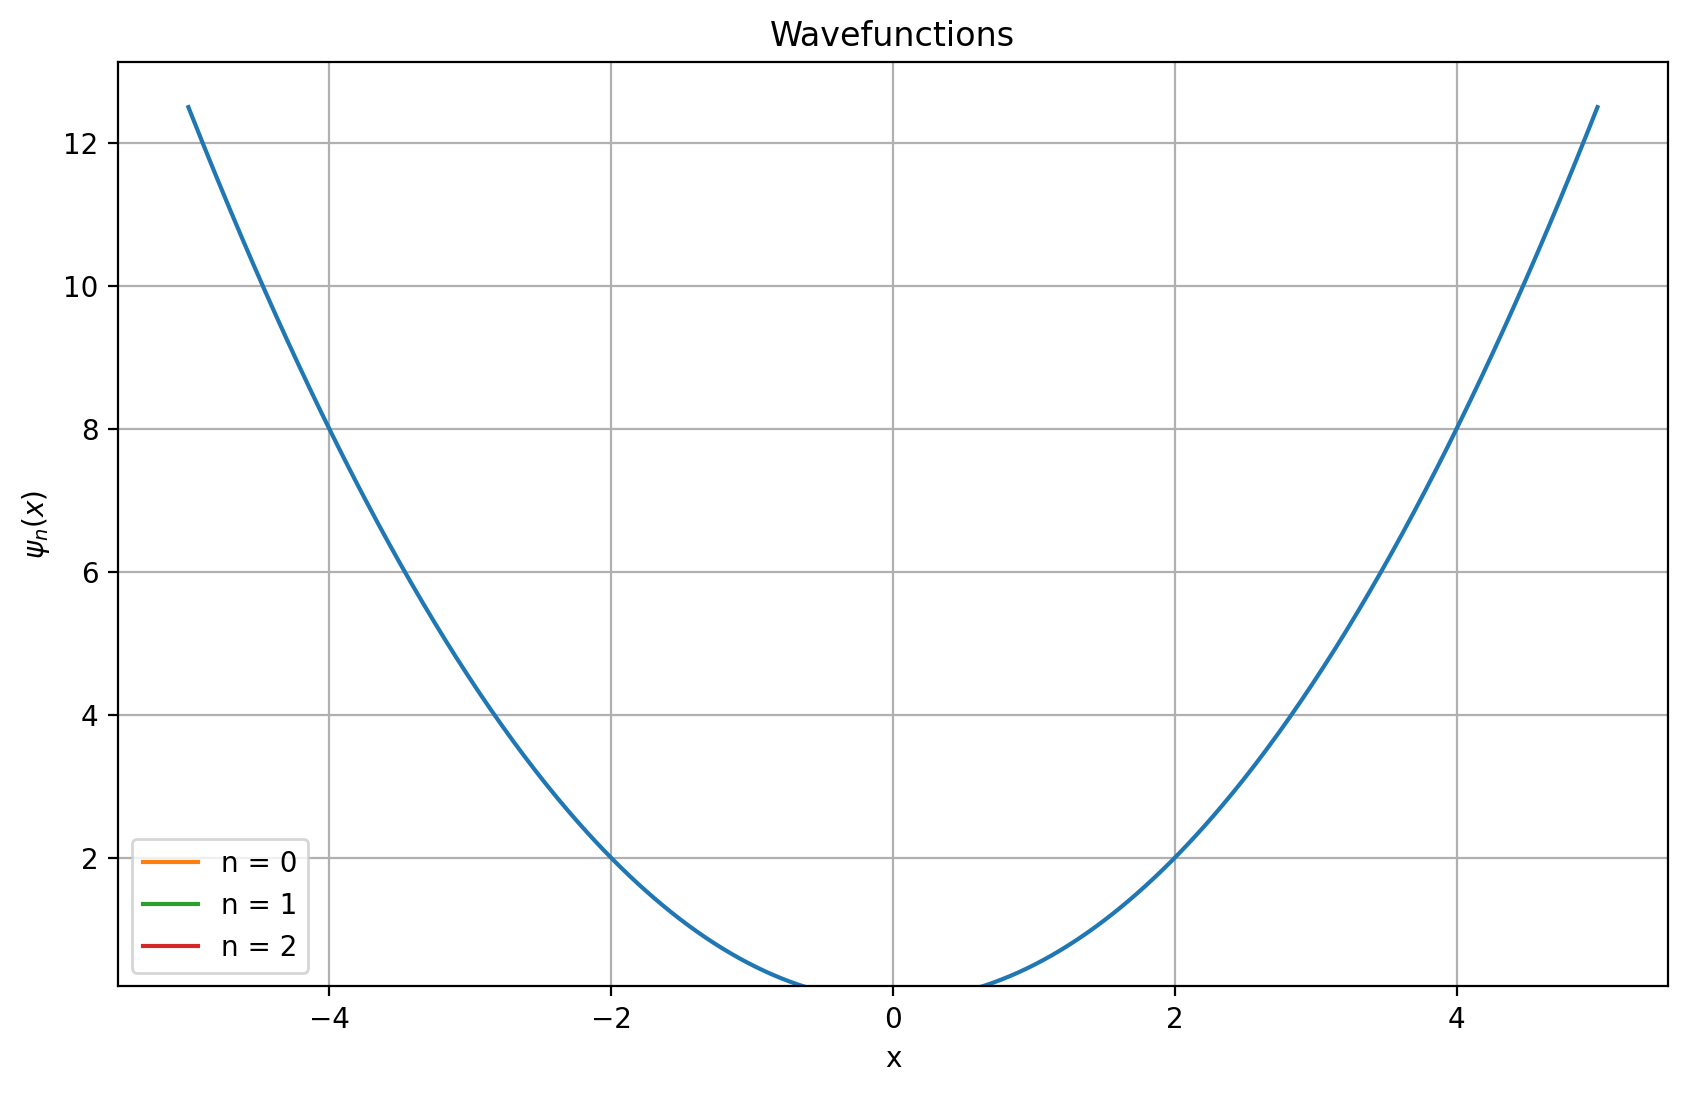

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
hbar = 1  # Planck's constant (reduced)
m = 1     # Mass of the particle
L = 10    # Length of the domain
N = 500   # Number of grid points
dx = L / (N + 1)  # Grid spacing

# Define potential (e.g., harmonic oscillator: V(x) = 0.5 * m * omega^2 * x^2)
omega = 1
x = np.linspace(-L/2, L/2, N)
V = 0.5 * m * omega**2 * x**2

# Construct the Hamiltonian matrix H
a = -hbar**2 / (2 * m * dx**2)
b = 2 * hbar**2 / (2 * m * dx**2) + V

H = np.zeros((N, N))
np.fill_diagonal(H, b)
np.fill_diagonal(H[1:], a)
np.fill_diagonal(H[:, 1:], a)

# Solve the eigenvalue problem
eigenvalues, eigenvectors = np.linalg.eigh(H)

# Display the first 5 energy levels
print("First 5 energy levels:")
for i in range(5):
    print(f"E_{i} = {eigenvalues[i]:.4f}")

# Plot the first 3 wavefunctions
plt.figure(figsize=(10, 6))

plt.plot(x,V)
plt.ylim( 0.2)
for i in range(3):
    plt.plot(x, eigenvectors[:, i], label=f"n = {i}")
    
plt.title("Wavefunctions")
plt.xlabel("x")
plt.ylabel(r"$\psi_n(x)$")
plt.legend()
plt.grid()
plt.show()



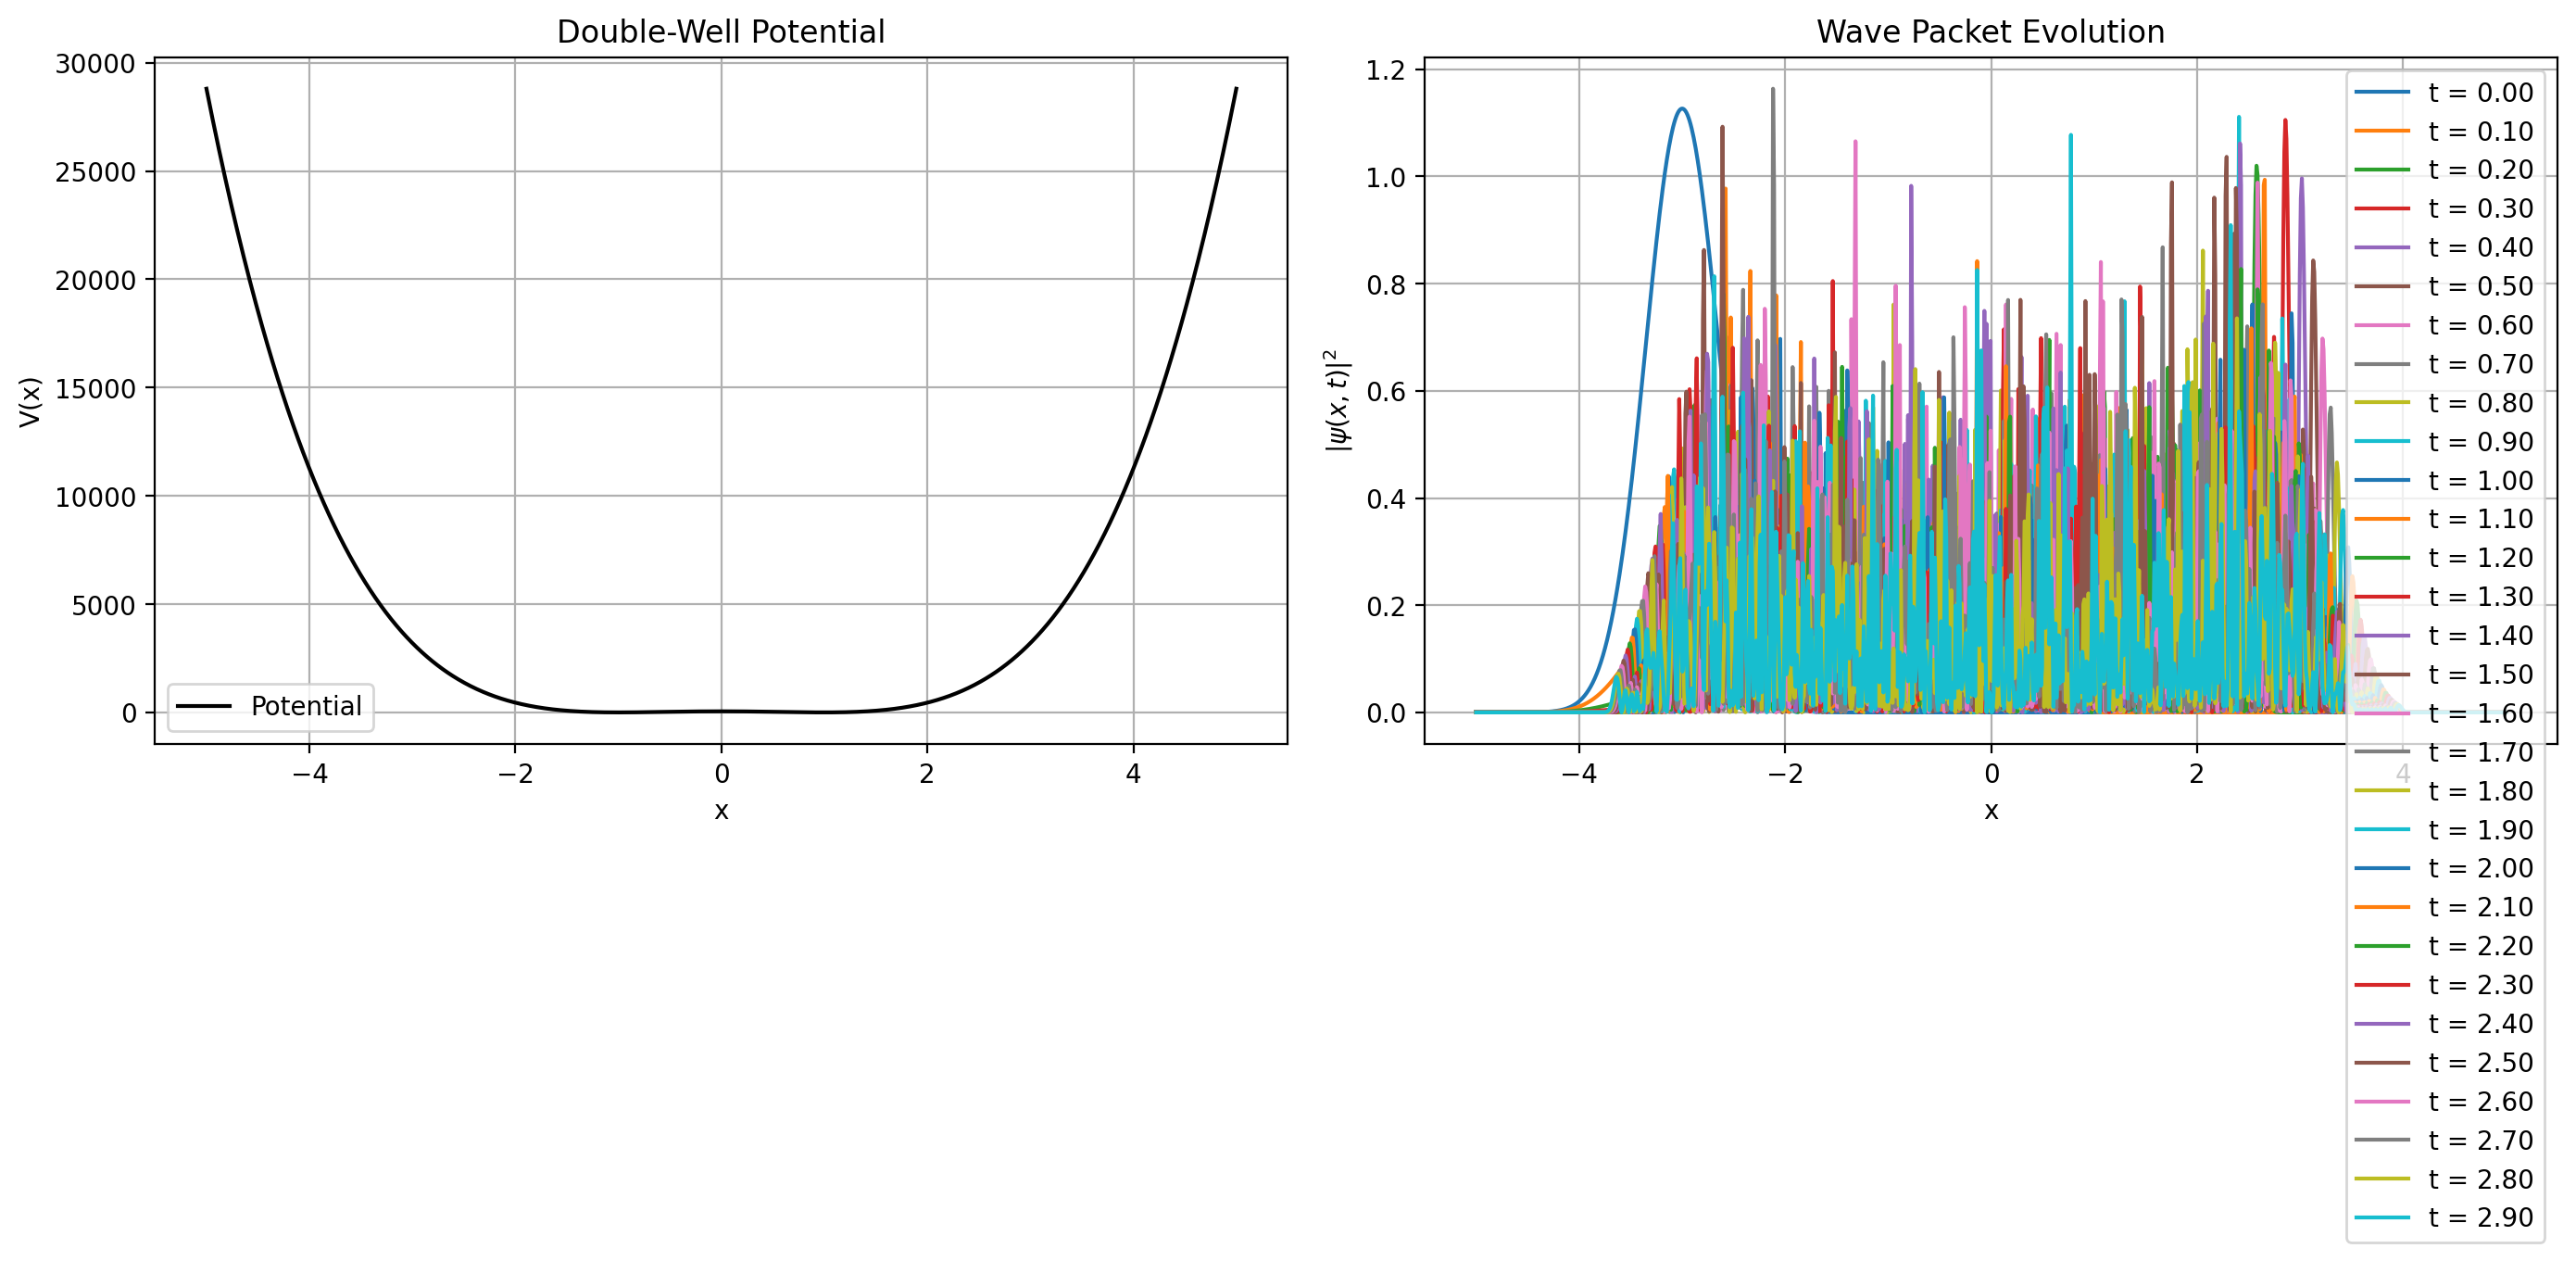

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import splu

# Define constants
hbar = 1.0       # Reduced Planck's constant
m = 1.0          # Mass of the particle
L = 10.0         # Length of the domain
N = 1000         # Number of grid points
dx = L / (N + 1) # Grid spacing
dt = 0.001       # Time step
steps = 3000     # Number of time steps

# Create spatial grid
x = np.linspace(-L/2, L/2, N)

# Define double-well potential
V0 = 50.0
a = 1.0
V = V0 * ((x**2 / a**2) - 1)**2

# Initialize Gaussian wave packet
x0 = -3.0    # Initial position
k0 = 5.0     # Initial wavenumber
sigma = 0.5  # Width of the wave packet
psi0 = np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.exp(1j * k0 * x)
psi0 /= np.sqrt(np.sum(np.abs(psi0)**2) * dx)  # Normalize

# Construct Hamiltonian matrix H
a_val = -hbar**2 / (2 * m * dx**2)
b = hbar**2 / m / dx**2 + V
H = diags([a_val, b, a_val], [-1, 0, 1], shape=(N, N))

# Crank-Nicolson coefficients
I = diags([1], [0], shape=(N, N))
A = (I + 1j * dt / (2 * hbar) * H)
B = (I - 1j * dt / (2 * hbar) * H)

# Precompute LU decomposition for efficiency
lu = splu(A.tocsc())

# Time evolution function
def evolve(psi):
    return lu.solve(B @ psi)

# Time evolution loop
psi = psi0.copy()
probs = []

for t in range(steps):
    psi = evolve(psi)
    if t % 100 == 0:
        probs.append(np.abs(psi)**2)

# Plot results
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Potential
ax[0].plot(x, V, color='black', label='Potential')
ax[0].set_title('Double-Well Potential')
ax[0].set_xlabel('x')
ax[0].set_ylabel('V(x)')
ax[0].legend()
ax[0].grid()

# Probability density evolution
for i, p in enumerate(probs):
    ax[1].plot(x, p, label=f"t = {i * 100 * dt:.2f}")
ax[1].set_title('Wave Packet Evolution')
ax[1].set_xlabel('x')
ax[1].set_ylabel(r'$|\psi(x, t)|^2$')
ax[1].legend()
ax[1].grid()

plt.tight_layout()
plt.show()



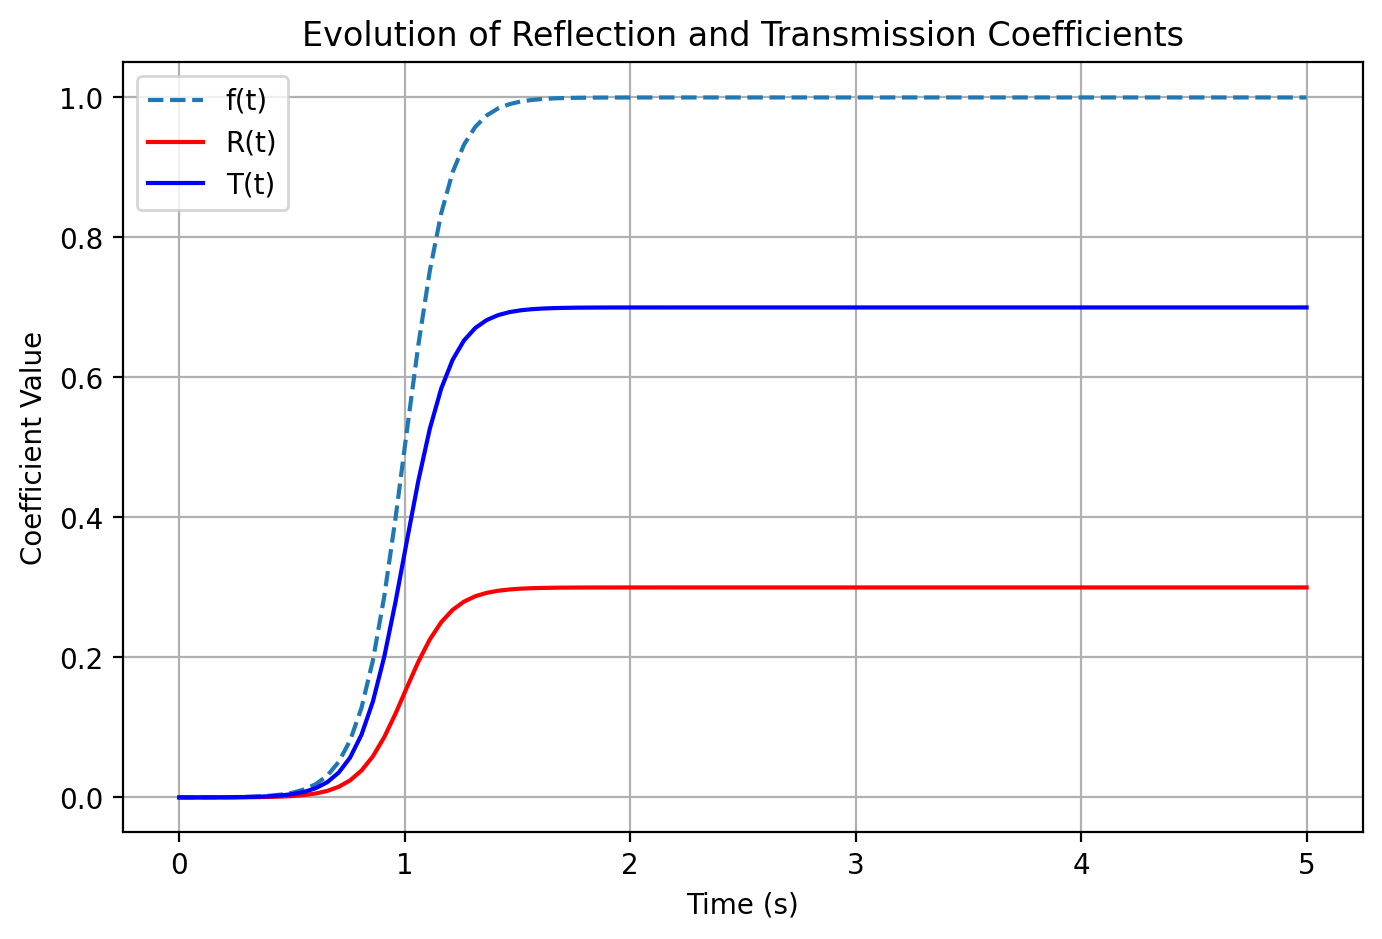

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1  # Set hbar = 1 for simplicity (use real value if needed)
m = 1     # Mass of the particle
k0 = 5    # Central wave number
sigma = 1 # Wave packet width
x0 = -5   # Initial position of wave packet
x_well = 0  # Center of the potential well

# Compute group velocity
v_g = (hbar * k0) / m

# Time values
t_vals = np.linspace(0, 5, 100)

# Define f(t) (Fraction of wave packet that has interacted)
def f_t(t):
    return 0.5 * (1 + np.tanh((x0 + v_g * t - x_well) / sigma))

# Compute f(t) over time
f_values = f_t(t_vals)

# Define final reflection and transmission coefficients (assume known values)
T_inf = 0.7  # Example final transmission coefficient
R_inf = 0.3  # Example final reflection coefficient

# Compute dynamic R(t) and T(t)
T_values = f_values * T_inf
R_values = f_values * R_inf

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(t_vals, f_values, label="f(t)", linestyle="dashed")
plt.plot(t_vals, R_values, label="R(t)", color="red")
plt.plot(t_vals, T_values, label="T(t)", color="blue")
plt.xlabel("Time (s)")
plt.ylabel("Coefficient Value")
plt.legend()
plt.title("Evolution of Reflection and Transmission Coefficients")
plt.grid()
plt.show()
